In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../System Manager/Python/cancer.csv')

In [3]:
print('Number of rows in the dataset: ', df.shape[0])
print('Number of columns in the dataset: ', df.shape[1])

Number of rows in the dataset:  569
Number of columns in the dataset:  31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis(1=m, 0=b)      569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
dist = df['diagnosis(1=m, 0=b)'].value_counts()
result = pd.DataFrame(dist)
result['percentage'] = result['count']/result['count'].sum() * 100
result

,count,percentage
"diagnosis(1=m, 0=b)",,
0,357,62.741652
1,212,37.258348


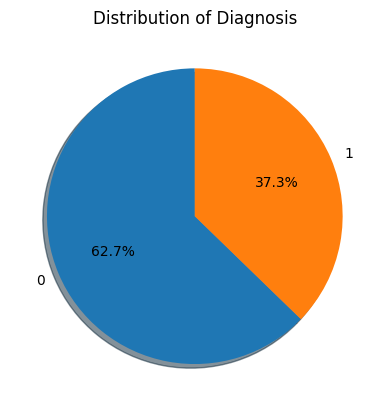

In [6]:
plt.pie(result['percentage'], labels=result.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of Diagnosis')
plt.show()

Separate the features and target

In [7]:
X = df.drop(columns = 'diagnosis(1=m, 0=b)', axis=1)
y = df['diagnosis(1=m, 0=b)']

Split into train & test dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=40)

In [9]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (455, 30)
Shape of X_test:  (114, 30)
Shape of y_train:  (455,)
Shape of y_test:  (114,)


Train the model

In [10]:
model = LogisticRegression(solver='newton-cg')

model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [11]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

print('Accuracy of the data: ', training_data_accuracy)

Accuracy of the data:  0.9538461538461539


In [12]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

print('Accuracy of the data: ', test_data_accuracy)

Accuracy of the data:  0.9736842105263158


In [24]:
import seaborn as sns
import sklearn.metrics as metrics

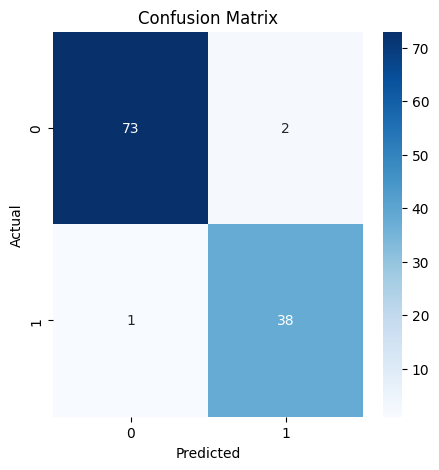

In [33]:
# Create the confusion matrix
cm = metrics.confusion_matrix(y_test, X_test_prediction)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Build predictive system

In [13]:
input_data = df.iloc[300:301, :]
input_data

,"diagnosis(1=m, 0=b)",radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
300,1,19.53,18.9,129.5,1217.0,0.115,0.1642,0.2197,0.1062,0.1792,...,25.93,26.24,171.1,2053.0,0.1495,0.4116,0.6121,0.198,0.2968,0.09929


In [14]:
test = input_data.drop(columns='diagnosis(1=m, 0=b)', axis=1)
test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
300,19.53,18.9,129.5,1217.0,0.115,0.1642,0.2197,0.1062,0.1792,0.06552,...,25.93,26.24,171.1,2053.0,0.1495,0.4116,0.6121,0.198,0.2968,0.09929


In [15]:
input_data_as_np_array = np.asarray(test)

input_data_reshaped = input_data_as_np_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print('the prediction is ', prediction)

if (prediction[0] == 0):
    print('The breast cancer is malignant')

else:
    print('The breast cancer is benign')

the prediction is  [1]
The breast cancer is benign


C:\Users\System Manager\anaconda3\envs\JupyterNotebook\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


AUC score: 0.9955555555555555


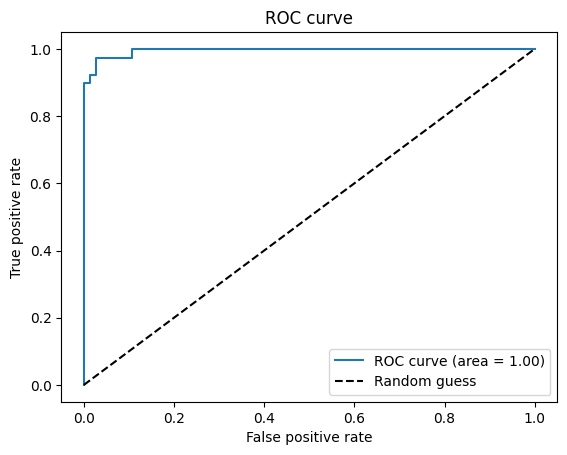

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Calculate the AUC score
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print('AUC score:', auc_score)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC curve (area = {0:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()